Some visualizations and explanations on what is maid in others files

In [1]:
import pandas as pd
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import math
from tqdm import tqdm
from time import time

In [2]:
import  ProjectPackage.DataExtraction as de
import ProjectPackage.Kinematic as km
from ProjectPackage import Cut

In [3]:
from scipy.optimize import curve_fit
from scipy.stats import norm

We load a run of data

In [4]:
data_folder = 'D:/Data_muons/dimuonData_LHC18m'
run_number = 291944
events = de.read_root_file(data_folder, run=run_number, entry_stop=30000)

Size of the data file : 139705170 Mo.
Extraction took 1.9 s.
Number of events : 30000.


A bit of filtering

In [5]:
events = Cut.cut_nMuons(events)
events = Cut.cut_CMUL(events)

This cut rejects 91.29 % of the statistics
This cut rejects 38.23 % of the statistics


A visualizations of the cut on the z coordinate

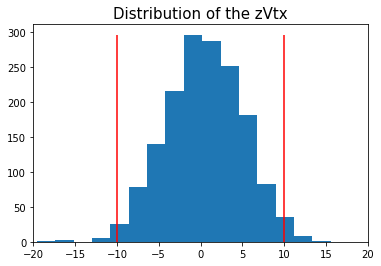

In [5]:
h = plt.hist(events.zVtx, bins=20)
plt.xlim(-20,20)
plt.title("Distribution of the zVtx", fontsize=15, fontweight=14)
plt.vlines([-10, 10], [0,0], [h[0].max(), h[0].max()], colors='r')

In [6]:
events = Cut.z_cut(events)
print(f"Events remaining : {len(events)}")

This cut rejects 2.04 % of the statistics
Events remaining : 1581


In [7]:
df = de.muon_df(events)

Number of tracks : 3353.
Max number of possible muons pairs : 1997


DCA distribution

Text(0.5, 1.0, 'zDCA')

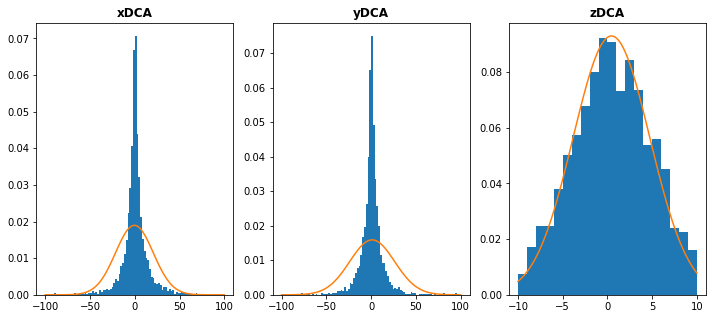

In [64]:
fig, ax = plt.subplots(1,3, figsize=(12,5))
bins = 60
x = np.linspace(-100,100,101)

ax[0].hist(df.xDCA.to_numpy(), bins=x, density=True)
ax[0].plot(x, norm.pdf(x, *norm.fit(df.xDCA)))
ax[0].set_title('xDCA', fontweight='bold', fontsize=12)

ax[1].hist(df.yDCA.to_numpy(), bins=x, density=True)
ax[1].plot(x, norm.pdf(x, *norm.fit(df.yDCA)))
ax[1].set_title('yDCA', fontweight='bold', fontsize=12)


ax[2].hist(df.zDCA.to_numpy(), bins=np.linspace(-10,10,21), density=True)
ax[2].plot(np.linspace(-10,10,101), norm.pdf(np.linspace(-10,10,101), *norm.fit(df.zDCA)))
ax[2].set_title('zDCA', fontweight='bold', fontsize=12)

In [58]:
norm.fit(df.xDCA, loc=df.xDCA.mean())

(-0.4424510616181397, 21.020020705759478)

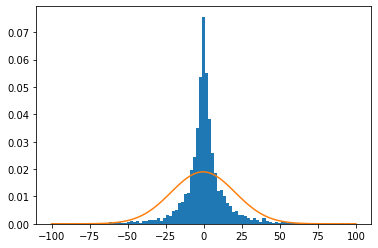

In [56]:
b = np.linspace(-100,100, 102)
plt.hist(df.xDCA.to_numpy(), bins=b, density=True)
plt.plot(b, norm.pdf(b, *norm.fit(df.xDCA)))
# plt.ylim(0, 0.07)

TypeError: curve_fit() missing 1 required positional argument: 'ydata'

In [8]:
df["P"] = df.apply(lambda x: Cut.p_fc(math.sqrt(x["Px"]**2 +  x["Py"]**2 + x["Pz"]**2), x['thetaAbs']) , axis=1)
df["DCA"] = df.apply(lambda x: math.sqrt(x["xDCA"]**2 +  x["yDCA"]**2 + x["zDCA"]**2), axis=1)
df['pDCA'] = df.P * df.DCA

[]

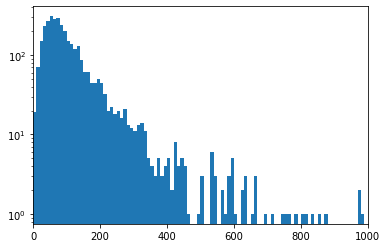

In [66]:
h1 = plt.hist(df.pDCA, bins=np.linspace(0,1000,101))
plt.xlim(0,1000)
plt.semilogy()
# plt.vlines(50,0, h1[0].max(), colors='r')

In [21]:
df['pDCA'].std()

499.89335390863675

In [67]:
df.head()

E        Px        Py         Pz  Charge  thetaAbs  \
entry subentry                                                               
0     0         24.952721 -1.378636  1.039364 -24.892694      -1  3.947988   
      1          7.629278 -0.342053 -0.248072  -7.616835       1  3.401121   
1     0         40.948765 -3.209173 -1.853931 -40.780560      -1  5.094156   
      1         64.867142  1.026864  7.215225 -64.456345       1  6.399544   
2     0          6.179737  0.252741 -0.019221  -6.173632      -1  2.572474   

                     xDCA       yDCA      zDCA          P        DCA  \
entry subentry                                                         
0     0         -0.099592  -0.385877 -5.856949  22.552498   5.870492   
      1         18.861176   8.311524 -5.856949   5.228546  21.427301   
1     0          0.765852   0.340823 -7.874046  38.548625   7.918541   
      1         -1.038053   0.416923 -7.874046  62.467051   7.953112   
2     0         16.769291  35.193218 -4.562401   3.178833  39.250315   

                      pDCA  
entry subentry              
0     0         132.394257  
      1         112.033634  
1     0         305.248878  
      1         496.807424  
2     0         124.770209

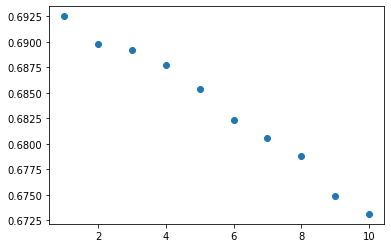

In [12]:
N_list = [ i for i in range(1,11)]
p_removed = []
ref = len(df)
for n in N_list:
    S = df.apply(lambda x : Cut.sigma_pxDCA(x['P'], x['thetaAbs'], N=n), axis=1)
    p_removed.append(1 - len(df[(S - df.pDCA) > 0]) / ref)

plt.scatter(N_list, p_removed)

Text(0.5, 1.0, 'Fraction of statistics rejected with $N_{\\sigma}$')

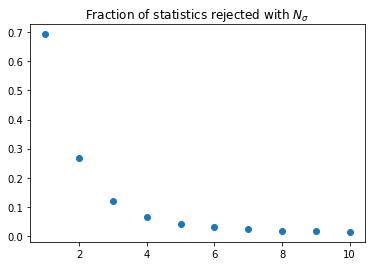

In [14]:
N_list = [ i for i in range(1,11)]
p_removed = []
ref = len(df)
for n in N_list:
    S = df.apply(lambda x : Cut.sigma_pxDCA(x['P'], x['thetaAbs'], N=n), axis=1)
    p_removed.append(1 - len(df[(n * S - df.pDCA) > 0]) / ref)

Text(0.5, 1.0, 'Fraction of statistics rejected with $N_{\\sigma}$')

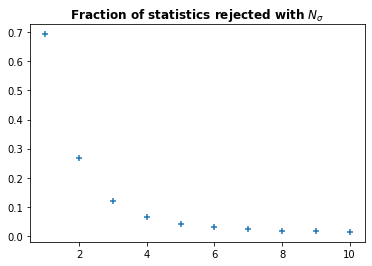

In [17]:
plt.scatter(N_list, p_removed, marker='+')
plt.title('Fraction of statistics rejected with $N_{\sigma}$', fontsize=12, fontweight='bold')

Text(0.5, 1.0, 'Fraction of statistics rejected with $N_{\\sigma}$')

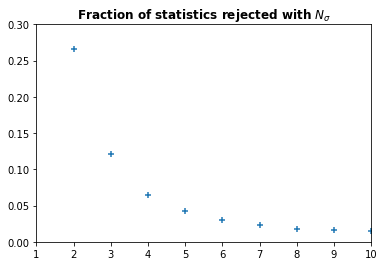

In [21]:
plt.scatter(N_list[1:], p_removed[1:], marker='+')
plt.xlim(1,10)
plt.ylim(0,0.3)
plt.title('Fraction of statistics rejected with $N_{\sigma}$', fontsize=12, fontweight='bold')